<a href="https://colab.research.google.com/github/rrodrig5/SwineFlu/blob/master/SwineFlu_Pandemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime as dt
import requests
import sys
from itertools import chain
import pycountry
import pycountry_convert as pc
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import GridSearchCV
from google.colab import files

In [0]:
!pip install pycountry-convert

     |████████████████████████████████| 10.0MB 3.5MB/s 
     |████████████████████████████████| 235kB 50.0MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=166438a9b219ff2c900eef2a2487f151f24d8d0170c9b18cf2cd605eacc5fdf1
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.1 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [0]:
!pip install plotly_express==0.4.0

In [0]:
uploaded = files.upload()

Saving SwineFlu.csv to SwineFlu.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "SwineFlu.csv" with length 56916 bytes


In [0]:
uploaded

{'SwineFlu.csv': b'Country,Cases,Deaths,Update Time\r\nAlgeria,5,0,7/6/2009 9:00\r\nAntigua and Barbuda,2,0,7/6/2009 9:00\r\nArgentina,2485,60,7/6/2009 9:00\r\nAustralia,5298,10,7/6/2009 9:00\r\nAustria,19,0,7/6/2009 9:00\r\nBahamas,7,0,7/6/2009 9:00\r\nBahrain,15,0,7/6/2009 9:00\r\nBangladesh,18,0,7/6/2009 9:00\r\nBarbados,12,0,7/6/2009 9:00\r\nBelgium,54,0,7/6/2009 9:00\r\n"Bermuda, UKOT",1,0,7/6/2009 9:00\r\nBolivia,416,0,7/6/2009 9:00\r\nBosnia and Hezegovina,1,0,7/6/2009 9:00\r\nBrazil,737,1,7/6/2009 9:00\r\n"British Virgin Islands, UKOT",2,0,7/6/2009 9:00\r\nBrunei Darussalam,124,0,7/6/2009 9:00\r\nBulgaria,10,0,7/6/2009 9:00\r\nCambodia,7,0,7/6/2009 9:00\r\nCanada,7983,25,7/6/2009 9:00\r\nCap Verde,3,0,7/6/2009 9:00\r\n"Cayman Islands, UKOT",14,0,7/6/2009 9:00\r\nChile,7376,14,7/6/2009 9:00\r\nChina,2040,0,7/6/2009 9:00\r\nColombia,118,2,7/6/2009 9:00\r\nCook Island,1,0,7/6/2009 9:00\r\nCosta Rica,277,3,7/6/2009 9:00\r\nCote d\'Ivoire,2,0,7/6/2009 9:00\r\nCroatia,1,0,7/6/2009 9:

In [0]:
import io

In [0]:
SwineFlu_df = pd.read_csv(io.StringIO(uploaded['SwineFlu.csv'].decode('cp1252')))

In [0]:
SwineFlu_df.head()

,Country,Cases,Deaths,Update Time
0,Algeria,5,0.0,7/6/2009 9:00
1,Antigua and Barbuda,2,0.0,7/6/2009 9:00
2,Argentina,2485,60.0,7/6/2009 9:00
3,Australia,5298,10.0,7/6/2009 9:00
4,Austria,19,0.0,7/6/2009 9:00


In [0]:
display(SwineFlu_df.head())
display(SwineFlu_df.describe())
display(SwineFlu_df.info())

,Country,Cases,Deaths,Update Time
0,Algeria,5,0.0,7/6/2009 9:00
1,Antigua and Barbuda,2,0.0,7/6/2009 9:00
2,Argentina,2485,60.0,7/6/2009 9:00
3,Australia,5298,10.0,7/6/2009 9:00
4,Austria,19,0.0,7/6/2009 9:00


,Cases,Deaths
count,1822.000000,1821.000000
mean,901.063666,4.315761
std,5264.291392,25.793340
min,1.000000,0.000000
25%,3.000000,0.000000
50%,13.500000,0.000000
75%,88.750000,0.000000
max,94512.000000,429.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1822 non-null   object 
 1   Cases        1822 non-null   int64  
 2   Deaths       1821 non-null   float64
 3   Update Time  1822 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 57.1+ KB


None

In [0]:
print(SwineFlu_df)

                       Country  Cases  Deaths     Update Time
0                      Algeria      5     0.0   7/6/2009 9:00
1          Antigua and Barbuda      2     0.0   7/6/2009 9:00
2                    Argentina   2485    60.0   7/6/2009 9:00
3                    Australia   5298    10.0   7/6/2009 9:00
4                      Austria     19     0.0   7/6/2009 9:00
...                        ...    ...     ...             ...
1817                  Thailand      2     0.0  5/23/2009 8:00
1818                    Turkey      2     0.0  5/23/2009 8:00
1819            United Kingdom    117     0.0  5/23/2009 8:00
1820  United States of America   6552     9.0  5/23/2009 8:00
1821               Grand Total  12022    86.0  5/23/2009 8:00

[1822 rows x 4 columns]


In [0]:
df_map = SwineFlu_df.copy()
df_map['Country'] = df_map['Country'].astype(str)
df_map = df_map.groupby(['Country','Update Time'], as_index=False)['Cases','Deaths'].sum()

In [0]:
df_map['log(Cases)'] = np.log(df_map.Cases + 1)
df_map['log(Deaths)'] = np.log(df_map.Deaths + 1)

In [0]:
px.choropleth(df_map,  
              color="log(Cases)", 
              hover_name="Update Time", 
              hover_data=["Cases"] ,
              animation_frame="Country",
              color_continuous_scale=px.colors.sequential.dense, 
              title='Total Cases growth(Logarithmic Scale)')

In [0]:
px.choropleth(df_map,  
              color="log(Deaths)", 
              hover_name="Update Time",
              hover_data=["Deaths"],
              animation_frame="Country",
              color_continuous_scale=px.colors.sequential.OrRd,
              title = 'Total Deaths growth(Logarithmic Scale)')

In [0]:
SwineFlu_df

,Country,Cases,Deaths,Update Time
0,Algeria,5,0.0,7/6/2009 9:00
1,Antigua and Barbuda,2,0.0,7/6/2009 9:00
2,Argentina,2485,60.0,7/6/2009 9:00
3,Australia,5298,10.0,7/6/2009 9:00
4,Austria,19,0.0,7/6/2009 9:00
...,...,...,...,...
1817,Thailand,2,0.0,5/23/2009 8:00
1818,Turkey,2,0.0,5/23/2009 8:00
1819,United Kingdom,117,0.0,5/23/2009 8:00
1820,United States of America,6552,9.0,5/23/2009 8:00


Text(0.5, 1.0, 'Cases vs Death')

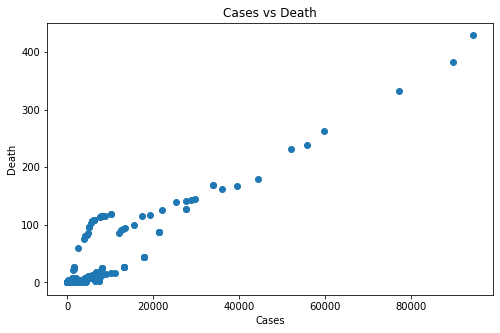

In [0]:
plt.figure(1, figsize = (8, 5))
x = SwineFlu_df.Cases[:, None]
y = SwineFlu_df.Deaths[:, None]
plt.scatter(x, y)
plt.xlabel('Cases')
plt.ylabel('Death')
plt.title('Cases vs Death')

In [0]:
def add_daily_measures(df):
    df.loc[0,'Daily Cases'] = df.loc[0,'Cases']
    df.loc[0,'Daily Deaths'] = df.loc[0,'Deaths']
    for i in range(1,len(df)):
        df.loc[i,'Daily Cases'] = df.loc[i,'Cases'] - df.loc[i-1,'Cases']
        df.loc[i,'Daily Deaths'] = df.loc[i,'Deaths'] - df.loc[i-1,'Deaths']
    #Make the first row as 0 because we don't know the previous value
    df.loc[0,'Daily Cases'] = 0
    df.loc[0,'Daily Deaths'] = 0
    return df

In [0]:
df_world = SwineFlu_df.copy()
df_world = df_world.groupby('Update Time',as_index=False)['Cases','Deaths'].sum()
df_world = add_daily_measures(df_world)
df_world['Cases:7-day rolling average'] = df_world['Daily Cases'].rolling(7).mean()
df_world['Deaths:7-day rolling average'] = df_world['Daily Deaths'].rolling(7).mean()

In [0]:
fig = go.Figure(data=[
    go.Bar(name='Cases', x=df_world['Update Time'], y=df_world['Daily Cases']),
    go.Bar(name='Cases', x=df_world['Update Time'], y=df_world['Daily Cases']),
    go.Bar(name='Deaths', x=df_world['Update Time'], y=df_world['Daily Deaths'])
])

fig.add_trace(go.Scatter(name='Cases:7-day rolling average',x=df_world['Update Time'],y=df_world['Cases:7-day rolling average'],marker_color='black'))
fig.add_trace(go.Scatter(name='Deaths:7-day rolling average',x=df_world['Update Time'],y=df_world['Deaths:7-day rolling average'],marker_color='darkred'))

# Change the bar mode
fig.update_layout(barmode='overlay', title='Worldwide daily Case and Death count',showlegend=False)
fig.show()

In [0]:
SwineFlu_df['Mortality Rate%'] = round((SwineFlu_df.Deaths/SwineFlu_df.Cases)*100,2)
px.line(SwineFlu_df, x='Update Time', y='Mortality Rate%', color='Country', title='Variation of Mortality Rate% \n(Top 10 worst affected countries)')

In [0]:
px.line(SwineFlu_df, x='Update Time', y='Deaths', color='Country', title='Swine Flu Total Deaths growth for top 10 worst affected countries')